<table style="width: 100%; border-style: none">
<tr style="border-style: none; background-color: #82a8cf">
<td style="border-style: none; width: 1%; text-align: left; font-size: 18px; color: #ffffff">Institut f&uuml;r Theoretische Physik<br /> <font color="#e6e6e6">Universit&auml;t zu K&ouml;ln </font></td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 18px; color: #ffffff">Prof. Dr. Simon Trebst<br /> <font color="#e6e6e6"> Theo Haas </font> </td>
</tr>
</table>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h1 style="font-weight:200; text-align: center; margin: 0px; font-size: 48px; padding:0px; color: #606060">Computer-Physik </h1>
<h1 style="font-weight:light; text-align: center; margin: 10px; padding:0px; color: #606060"> Schöner Plotten mit Makie &mdash; Teil 1 </h1>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h3 style="font-weight:400; text-align: center; margin: 0px; font-size: 20px; padding:0px; margin-bottom: 20px; color: #606060">Sommersemester 2025</h3>
<!--<h3 style="font-weight:bold; text-align: center; margin: 0px; font-size: 15px; padding:0px; margin-bottom: 20px;">Website: <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></h3> -->

<font size="4" color="#606060">**Website:** <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2025-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2025-CompPhys.shtml</a></font>

<font size="4" color="#606060">**Themen dieses Notebooks**: <span style="color:#606060"> Line- und Scatterplots, Heatmaps, Histogramme, Anatomie eines Plots, grundlegende Layout-Gestaltung, weiterführende Links  </span> 
    
<hr style="height:.3px"> 

# 0. Installation

In [ ]:
]add GLMakie, CairoMakie

In [ ]:
using CairoMakie

# 1. Grundlegende Funktionen

Im ersten Teil demonstrieren wir die wichtigsten Plotfunktionen von Makie. Wir betrachten
- Scatterplots
- Lineplots
- Scatterlineplots
- Heatmaps
- Histogramme

Das ist natürlich nur ein kleiner Ausschnitt der Funktionalitäten von Makie. Einen Überblick findet man z.B. [hier](https://docs.makie.org/stable/examples/plotting_functions/). In diesem Abschnitt geht es nur um die grundlegenden Funktionen zum Anzeigen der Daten. Wie man seine Bilder verschönert, eine Abbildung erzeugt, die mehrere Unterplots enthält, und Attribute wie Achsenbeschriftungen, etc. hinzufügt, lernen wir im zweiten Abschnitt.

In [ ]:
# Zum Plotten braucht man Daten.
x1 = 0:0.1:2
y1 = rand(21)

x2 = range(0, 3pi, 100)
y2 = cos.(x2);

## 1.1 Scatterplots

In [ ]:
scatter(x1,y1)

In [ ]:
scatter(y1)

In [ ]:
scatter(x2,y2)

In [ ]:
f(x) = cos(10*x^2) * exp(-x)
xs = range(0,1, length = 50)

In [ ]:
# Alternative Schreibweise zu scatter(array_xwerte, array_ywerte) ist scatter(array_xwerte, funktion)
scatter(0:0.1:10, sqrt)

#### Anpassen von Farbe, Form und Größe der Marker:

In [ ]:
?scatter

In [ ]:
scatter(x2,y2, color =:red, marker =:hexagon, markersize = 25)

#### Weitere Eigenschaften ändern:

In [ ]:
# Markersize und Color werden nicht als eine Größe / Farbe übergeben, sondern als Array.
# So kann man jedem Punkt eine eigene Größe / Farbe aus einer Colormap gemäß dem Array-Einträgen zuordnen
scatter(x2, y2, markersize = range(1, 25, length = 100), marker = 'M', rotation = 2*pi/3,
    colormap =:viridis, color = rand(100))

Mehr Informationen und weitere Beispiele zu Scatterplots finden sich [hier.](https://docs.makie.org/stable/examples/plotting_functions/scatter/)

## 1.2  Lineplots

In [ ]:
lines(x2,y2)

#### Anpassen von Stil, Dicke und Farbe der Linie:

In [ ]:
?lines

In [ ]:
lines(x2,y2, linestyle = :dashdotdot, linewidth = 4, color = :red)

#### Weitere Eigenschaften ändern:

In [ ]:
lines(x2,y2, linestyle = :solid, linewidth = 8, colormap = :viridis, color = rand(100))

Mehr Informationen und weitere Beispiel zu Lineplots finden sich [hier.](https://docs.makie.org/stable/examples/plotting_functions/lines/)

## 1.3 Scatterlineplots

In [ ]:
scatterlines(x2,y2)

## 1.4 Heatmaps

In [ ]:
# 2D Daten erzeugen.
A = rand(35,25); # Zufallsmatrix mit 35 Zeilen und 25 Spalten

xs = range(0, 3π, length=200)
ys = range(0, 2π, length=200)

zs = zeros(200,200)
for i in 1:200
    for j in 1:200
        # zs = f(x,y) ist eine Funktion, die von zwei Parametern abhängt.
        zs[i,j] = sin(xs[i]) * cos(ys[j]) 
    end 
end 

In [ ]:
heatmap(A)

In [ ]:
heatmap(xs, ys, zs)

#### Eigenschaften ändern

In [ ]:
?heatmap

In [ ]:
heatmap(A, interpolate = true)

In [ ]:
heatmap(xs,ys, zs, colorrange = (-0.5, 0.75), lowclip =:red, highclip =:cyan)

## 1.5 Histogramme

In [ ]:
r1 = rand(100000) # Zufallszahlen uniform
r2 = randn(10000); # Zuffalszahlen normalverteilt

In [ ]:
hist(r1)

In [ ]:
hist(r2)

#### Eigenschaften ändern:

In [ ]:
?hist

In [ ]:
hist(r2, bins = 30, normalization = :pdf, bar_labels= :values, color = :values)

# 2. Anatomie eines Plots

Ein Plot in Makie besteht aus drei grundsätzlichen Bauteilen:

1. **Figure** ist ein *Container* in dem alle anderen Elemente gesammelt werden. 
2. **Blocks** sind Layout-Elemente, die bestimmte Bereiche der Figure ausfüllen. Beispiele für Blocks sind
    - Achsenumgebungen
    - Titel
    - Colorbars
    - Legenden
    - ...
3. **Plots** sind alles, was Makie visualisiert

## 2.1 Figure

In [ ]:
fig = Figure(backgroundcolor =:tomato, size = (800,800)) # Erzeugt eine (leere) Figure.

## 2.2 Blocks

Blocks sind Layout Elemente, die in eine `Figure` eingefügt werden. Ein Beispiel dafür ist `Axis`. Axis erzeugt 2d Achsen für uns und gibt Daten so eine Skala.
Damit das ganze angezeigt wird muss am Ende der Zelle die `fig` stehen. Das war in Kapitel 1 immer impliziert.

In [ ]:
fig = Figure(size = (600,600), backgroundcolor = :tomato) # Erzeugt eine (leere) Figure.

ax = Axis(fig[1,1]) # Fügt eine Achsenumgebung hinzu.

fig # Zeigt die Figure an

Blocks kann man genauso positionieren, wie man Einträge eines Arrays ansprechen würde.
Beispiel: 
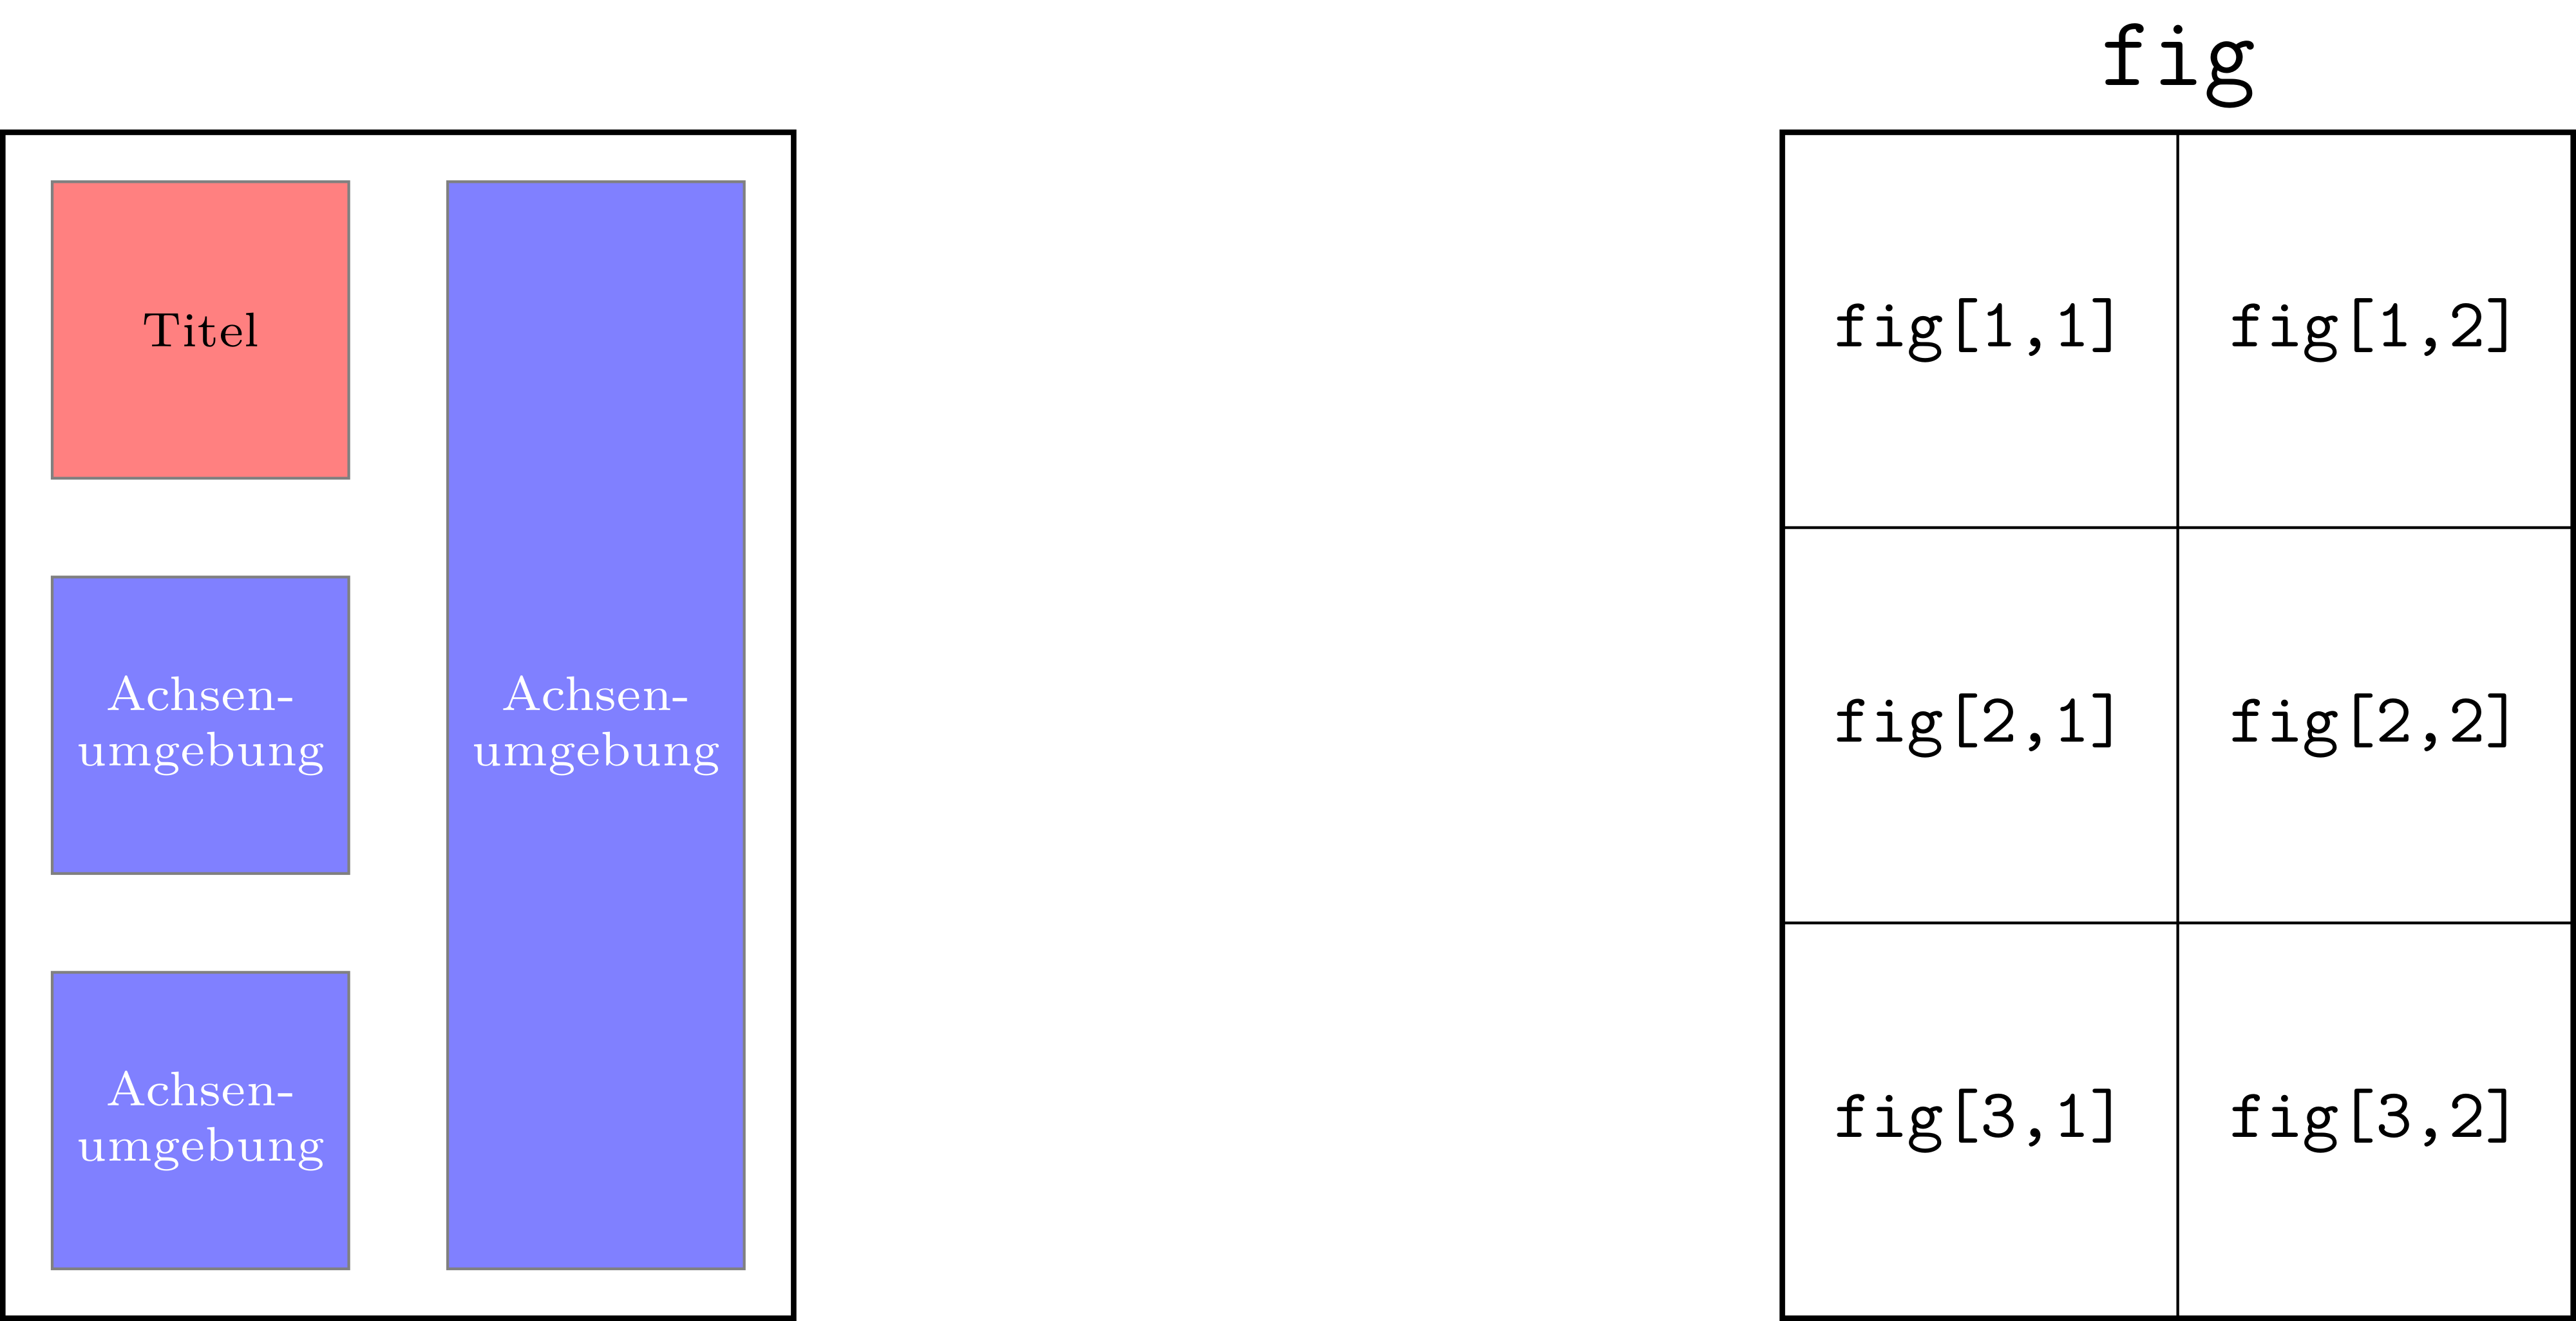

In [ ]:
fig = Figure(size = (600,600), backgroundcolor =:tomato) # Leere Figure

ax1 = Axis(fig[2,1]) # Erste Achsenumgebung an 'Eintrag' [2,1]
ax2 = Axis(fig[3,1]) # Zweite Achsenumgebung an 'Eintrag' [3,1]

# Titel an Position [1,1], tellwidth = false bewirkt, dass der Titel seine Breite nicht dominant weitergibt.
Label(fig[1,1], "Meine erste Figure", tellwidth = false, tellheight = false, fontsize= 30)

ax3 = Axis(fig[1:3,2]) # Zweite Achsenumgebung in der ganzen zweiten Spalte

fig

In [ ]:
?Label

## 2.3 Plots

In [ ]:
fig = Figure(size = (600,600), backgroundcolor = :tomato) # Leere Figure

ax = Axis(fig[2,1]) # Achsenumgebung dazu
Label(fig[1,1], "Meine zweite Figure", fontsize = 30, tellwidth = false)


# Plots in die Achsenumgebung ax dazu.
#scatter!(rand(20), marker = 'o', color = :green, markersize = 15)
scatter!(ax, rand(20), marker = 'o', color = :green, markersize = 15)

scatterlines!(ax, 0:0.1:20, cos.(0:0.1:20), color = :cyan)

f(x) = sqrt(abs(cos(x)))
lines!(ax, 0:0.1:20, f.(0:0.1:20), color = :red, linewidth = 5)

fig

### Zusammenhang zu den "one linern" aus dem ersten Abschnitt:

Diese drei Möglichkeiten einen Plot zu erzeugen sind äquivalent:


```julia
fig, ax, p = scatter(0:0.1:7, cos, marker = 'x', color = :blue, markersize = 20)
```
---
```julia
fig = Figure()
ax, p = scatter(fig[1,1], 0:0.1:7, cos, marker = 'x', color = :blue, markersize = 20)
fig
```
---
```julia
fig = Figure()
ax = Axis(fig[1, 1])
p = scatter!(ax, 0:0.1:7, cos, marker = 'x', color = :blue, markersize = 20)
fig
```

In [ ]:
fig = Figure()
ax = Axis(fig[1, 1])
p = scatter!(ax, 0:0.1:7, cos, marker = 'x', color = :blue, markersize = 20)
fig

## 2.4 Was ein Plot noch braucht: Achsenbeschriftungen, Legende, etc.

In [ ]:
?Axis

In [ ]:
fig = Figure(size = (600,600), backgroundcolor = :tomato) # Leere Figure

ax = Axis(fig[2,1], xlabel = L"x", ylabel = L"α") # Achsenumgebung mit Labeln dazu.

# Farbe der xtickcolor für Achsenumgebung ax auf weiß gesetzt
ax.xtickcolor = :white 

# Titel dazu
Label(fig[1,1], "Achsenbeschriftung und mehr", fontsize = 30, tellwidth = false)

# Plots dazu
scatter!(ax, rand(20), marker = 'o', color = :green, markersize = 15, label ="Gruene Punkte o")
scatterlines!(ax, 0:0.1:20, cos.(0:0.1:20), color = :cyan, label = "Scatterlinie in Cyan")

f(x) = sqrt(abs(cos(x)))
lines!(ax, 0:0.1:20, f.(0:0.1:20), color = :red, linewidth = 5, label = L"Irgendwas mit $\cos$")

# Legende fuer all gelabelten Plots in Achsenumgebung ax.
Legend(fig[2,1], ax, tellwidth = false, halign =:left, valign =:bottom)

fig

## 2.5 Zum Abschluss ein etwas komplexeres Beispiel

In [ ]:
x = 0:0.05:10

In [ ]:
fig = Figure(size = (1100, 500), backgroundcolor = :lightgray) # Leere Figure

lab1 = Label(fig[1,1:2], "Ein komplexeres Beispiel") # Label dazu

# Eigenschaften des Labels ändern
lab1.color = :red
lab1.tellheight = false

# Drei Achsenumgebungen dazu
ax1 = Axis(fig[2:3, 1:2])
ax2 = Axis(fig[1:2,3])
ax3 = Axis(fig[3,3])

# Plots in Achsenumgebung ax1
scatter!(ax1, x, cos.(x), color =:red, marker ='x', label = L"\cos(x)")
plt2 = lines!(ax1, x, sin.(x))

# Eigenschaften des Plots plt2 anpassen
plt2.colormap = :viridis
plt2.linewidth = 6
plt2.label = "sin(x)"

# Heatmap und Scatterplots in Achsenumgebung ax2
hm = heatmap!(ax2, range(1,10,length = 100), range(0,1,length = 100), [x + y for x in 1:100, y in 1:100])
hm.colormap = :cividis
scatter!(ax2, rand(10), color = :red, label = "Rote Punkte")
scatter!(ax2, rand(10), color = :blue, marker = :rect, label = "Blaue Quadrate")
sct3 = scatter!(ax2, rand(10))

# Eigenschaften von sct3 anpassen
sct3.color = :green
sct3.marker = '*'
sct3.markersize = 30
sct3.label = "Grüne Sterne"

# Histogramm in ax3 hinzufügen
hist!(ax3, randn(10000))

# Legende für Achsenumgebung ax1
leg1 = Legend(fig[3,1],ax1)

# Legende anpassen
leg1.bgcolor =:lightblue
leg1.framecolor =:red
leg1.nbanks = 2

# Legende für Achsenumgebung ax2
leg2 = Legend(fig[1,2], ax2, tellwidth = false, halign = :right)

# Nochmal Eigenschaften des Labels anpassen
lab1.halign = :left
lab1.fontsize = 25

# Grenzen in Achsenumgebung ax1 anpassen
limits!(ax1, 0., 9, -1.2, 0.95)

# Achsenbeschriftung Achsenumgebung ax1
ax1.xlabel = L"$x$ axis"
ax1.ylabel = L"$y$ axis"

# Colorbar für heatmap hm
Colorbar(fig[1:2,4], hm, label = "Temperature")

# Titel für Achsenumgebung 3
ax3.title = "Ein Histogramm"

# Keine ticks/ticklabels/Achsenlabels für Achsenumgebung ax3
hidedecorations!(ax3)
# Keine Achsen für Achsenumgebung ax3
hidespines!(ax3)

# Einige andere Eigenschaften ändern
ax3.backgroundcolor =:lightblue
ax3.titlefont =:regular
ax1.xgridcolor = :magenta

fig

Natürlich ist dieser Plot noch lange nicht fertig (und hat generell einige komische Attribute, die man z.B. niemals in Veröffentlichungen so sehen will). Aber was man hier (hoffentlich) lernt ist, wie man mit Makie und regelmäßiger Konsultation von `?` auch komplexere Plots einfach erzeugen kann. Im Zweifel hilft auch das Internet weiter.

## 2.6 Exportieren von Abbildungen

In [ ]:
fig = Figure(size = (800,400))
ax, p = scatter(fig[1,1], rand(100))
fig

In [ ]:
save("meinebitmap2.png", fig, px_per_unit = 2) # Abspeichern der Figure fig im png Format mit doppelter Auflösung.

In [ ]:
?save

# Dokumentation und Beispiele

- [Makie.jl Dokumentation](https://docs.makie.org/stable/)
- [Grundlagen](https://docs.makie.org/stable/tutorials/basic-tutorial/)
- [Kontrolle von Größe und Seitenverhältnis](https://docs.makie.org/stable/tutorials/aspect-tutorial/)
- [Layout Tutorial für Fortgeschrittene](https://docs.makie.org/stable/tutorials/layout-tutorial/)
- [Beispiele & Dokumentation für Plotting Funktionen](https://docs.makie.org/stable/examples/plotting_functions/)
- [Beispiele & Dokumentation für Blocks](https://docs.makie.org/stable/examples/blocks/)
- [Komplexere Beispiele (Beautiful Makie)](https://beautiful.makie.org/dev/)